In [2]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import scipy.ndimage.filters
from matplotlib import pyplot as plt
from matplotlib import colors


RGB
('R', 'G', 'B')
(768, 1024, 3)
(768, 1024, 3)


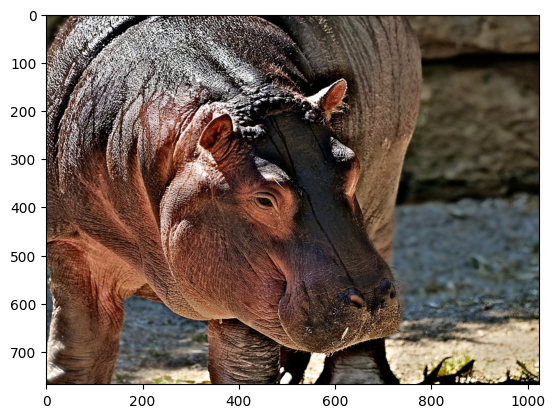

In [3]:

im = Image.open('../../sample_data/1024x768/test_images/indic-sharpness-5_orig.jpg')
print(im.mode)
print(im.getbands())
m = np.array(im)
print (m.shape)
#m = np.delete(m,0, 2)
#m = np.delete(m,1, 2)
print (m.shape)
h = m.shape[0]
w = m.shape[1]
#m = m.reshape(w,h)

plt.imshow(m, cmap='gray', vmin=0, vmax=255)

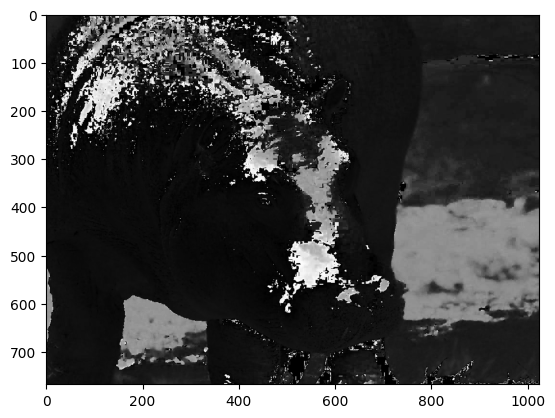

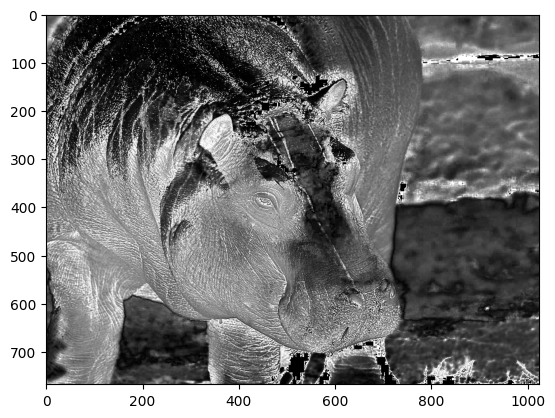

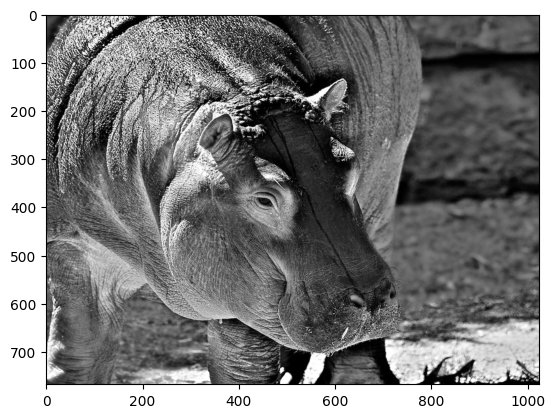

In [27]:

hsvimage =colors.rgb_to_hsv(m)
hue = hsvimage[:,:,0]
sat = hsvimage[:,:,1]
value = hsvimage[:,:,2]

plt.figure()
plt.imshow(hue*255, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(sat*255, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(value, cmap='gray', vmin=0, vmax=255)

In [28]:
normV = value/255

In [29]:
saturated = [(p > 0.2) for p in sat.flatten()]
middleValues = [((p > 0.15) and (p < .95)) for p in normV.flatten()]

In [30]:
hue2 = hue.flatten()[saturated and middleValues]

In [8]:
hist = np.histogram(hue2,bins=20)
print (hist[0])
maxHue = max(hist[0])
print(maxHue)
t = maxHue * 0.05
count = 0
for i in range(20):
    n = hist[0][i]
    if n > t:
        count += 1
print ("COUNT:", count)
feature = 20 - count
print ("FEAUTRE:", feature)


[  3778   1706  62632  52366  15133   9410   6794  15861  52777  67453
 238518 163127  76942  12176   3801    492     40     54    509    140]
238518
COUNT: 10
FEAUTRE: 10


In [31]:
histarr = np.array(hist).flatten()

/tmp/ipykernel_13965/3446506707.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  histarr = np.array(hist).flatten()


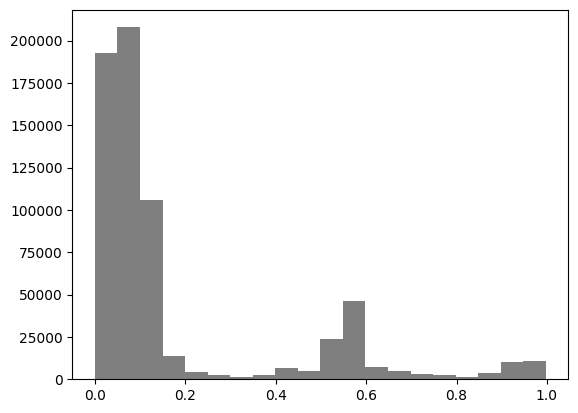

In [32]:
# Plot the luminance histogram for the grayscale image
plt.hist(hue2.flatten(),bins=20, density=False, color='black', alpha=0.5)

# Show the plot
plt.show()